# MDIBL Transcriptome Assembly Learning Module
# Notebook 3: Using TransPi to Performing an "Annotation Only" Run

## Overview

In the previous notebook, we ran the entire default TransPi workflow, generating a small transcriptome from a test data set. While that is a valid exercise in carrying through the workflow, the downstream steps (annotation and assessment) will be unrealistic in their output, since the test set will only generate a few hundred transcripts. In contrast, a more complete estimate of a vertebrate transcriptome will contain tens to hundreds of thousands of transcripts.

In this notebook, we will start from an assembled transcriptome. We will work with a more realistic example that was generated and submitted to the NCBI Transcriptome Shotgun Assembly archive.


## Learning Objectives:

1. **Understanding the TransPi workflow and its components:** The notebook builds upon previous knowledge of TransPi, focusing on the annotation stage, separating it from the assembly process.  It reinforces the understanding of the overall workflow and its different stages.

2. **Performing an "annotation-only" run with TransPi:** The primary objective is to learn how to execute TransPi, specifically utilizing the `--onlyAnn` option to process a pre-assembled transcriptome. This teaches efficient use of the tool and avoids unnecessary recomputation.

3. **Working with realistic transcriptome data:** The notebook shifts from a small test dataset to a larger, more realistic transcriptome from the NCBI Transcriptome Shotgun Assembly archive. This exposes learners to the scale and characteristics of real-world transcriptome data.

4. **Using command-line tools for data manipulation:**  The notebook uses `grep`, `perl` one-liners, and `docker` commands to count sequences, modify configuration files, and manage containerized applications. This improves proficiency in using these essential bioinformatics tools.

5. **Interpreting TransPi output:**  Learners analyze the `RUN_INFO.txt` file and other output files to understand the analysis parameters and results. This develops skills in interpreting computational biology results.

6. **Understanding and using containerization (Docker):** The notebook introduces the concept of Docker containers and demonstrates how to utilize a BUSCO container to run the BUSCO analysis, highlighting the benefits of containerization for reproducibility and dependency management.  This teaches practical application of containers in bioinformatics.

7. **Running BUSCO analysis:** Learners execute BUSCO, a crucial tool for assessing the completeness of transcriptome assemblies. This extends their skillset to include running and interpreting BUSCO results.

8. **Interpreting BUSCO and other annotation results:**  The notebook includes checkpoints that challenge learners to interpret the BUSCO results, GO stats, and TransDecoder stats, fostering critical thinking and data interpretation skills.

9. **Critical evaluation of data sources:** The notebook encourages learners to consider the source and context of the transcriptome data used, prompting reflection on data quality and limitations.  This emphasizes responsible use of biological data.

10. **Independent BUSCO analysis:**  The final checkpoint task requires learners to independently run a BUSCO analysis on a new transcriptome, selecting a data source and lineage, and interpreting the results. This assesses the understanding and practical application of the concepts covered in the notebook.

## Prerequisites

* **Nextflow:** The core workflow engine used to manage the TransPi pipeline.
* **Perl:** Used for a one-liner to modify the Nextflow configuration file.
* **Docker:** Used to run BUSCO in a containerized environment.
* **BUSCO:** The Benchmarking Universal Single-Copy Orthologs program for assessing genome completeness.
* **TransPi:**  The specific transcriptome assembly pipeline.  The notebook assumes this is pre-installed or available through Nextflow.
* **Command-line tools:** Basic Unix command-line utilities like `grep`, `ls`, `cat`, `pwd`, etc., are used throughout the notebook.

## Get Started

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('AGuUHmSobEA', width=800, height=400)

> <img src="../images/AnnotationProcess.png" width="800">
>
> **Figure 1:** Annotation workflow for a new, unannotated transcriptome. 

In [ ]:
%cd /home/jupyter

In [ ]:
! pwd

<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  The Transcriptome
</div>

> The transcriptome that we are using has already been downloaded onto your local directory. It lives within the `resources` directory in the sub-directory named `trans`. It is in the file format `.fa`.

**Step 2:** Count the sequences in this file.

> You should get a count of 31,176.

In [ ]:
! grep -c ">" ./resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa

<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  What is the Oncorhynchus mykiss?
</div>

> The Oncorhynchus mykiss is commonly known as the **Rainbow Trout**. Here is what they look like:
>
> <img src="../images/rainbowTrout.jpeg"  width="500" >
> 
>> Image Source: https://www.ndow.org/species/rainbow-trout/

**Step 3:** Using a Perl one-liner, we will change the output directory so that the results from the `--all` run in Submodule 02 do not get overwritten.

In [ ]:
# TransPi looks for a directory named onlyAnn. It expects one file per sample to perform the annotation
! mkdir -p onlyAnn
! cp ./resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa  ./onlyAnn/Oncorhynchus_mykiss_GGBN01.1.fa

In [ ]:
! perl -i.allloc -pe 's/basicRun/onlyAnnRun/g' ./TransPi/nextflow.config

<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  Perl
</div>

> <img src="../images/perl-logo.png" width="500">
>
>> Image Source: https://medium.com/@aman_adastra/techspace-what-is-perl-1e29a430676c
>
>**Mini History Lesson on Perl**
>
>So what is `Perl`? Surprisingly, there is no original acronym for the name, however, some have retroactively given this one: *Practical Extraction and Reporting Language*. It has aspects of many different programming languages and has a broad variety of applications. It was created as a text manipulation language by an expert in linguistics: Larry Wall. Interestingly, Larry Wall became a linguistic expert not to create a programming language but rather as a project to develop a written language for an exclusively oral language in Africa.
>
>**Comprehending the Perl one-liner**
>```python
!perl -i.allloc -pe 's/basicRun/onlyAnnRun/g' ./TransPi/nextflow.config
>```
>- `!`: This indicates that the line is to be executed as a command line argument. 
>- `perl`: This indicates that the argument is in the Perl programming language.
>- `-i.allloc`: This indicates that Perl should edit the input file and create a backup of this file with the added `.allloc` extension.
>- `-pe`: These are actually two separate options...
    - `-p`: This indicates that each line in the file is to be interpreted independently and printed after it has been processed. 
    - `-e`: This indicates that the Perl command is to be executed. 
>- `'s/basicRun/onlyAnnRun/g'`: This is the meat of the Perl one-liner. It is essentially a search and replace.
    - It searches for all occurrences of the string `basicRun`, and replaces it with the string `onlyAnnRun`.
>- `./TransPi/nextflow.config`: This points to the location of the input file.

**Step 4:** Now we can run TransPi using the option `--onlyAnn` which assumes that the transcriptome has been generated, and will only run the various steps for annotation of the transcripts.

>This run should take about **29 minutes**, assuming an N1 high-memory, 16 processor 104GB instance.

In [2]:
%%capture
! mamba create  -n nextflow -c bioconda nextflow -y
! mamba install -n nextflow ipykernel -y

<div class=\"alert alert-block alert-danger\">
    <i class=\"fa fa-exclamation-circle\" aria-hidden=\"true\"></i>
    <b>Alert: </b> Remember to change your kernel to <b>conda_nextflow_22_10_1</b> to run nextflow.
    </div>

In [ ]:
! nextflow run ./denovotranscript/main.nf --input ./denovotranscript/test_samplesheet.csv -profile aws --run_mode annotation_only \
  --transcript_fasta s3://nigms-sandbox/nosi-inbremaine-storage/resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa


 N E X T F L O W   ~  version 24.10.6

Launching `./denovotranscript/main.nf` [nostalgic_lovelace] DSL2 - revision: e7227e7015


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/denovotranscript 1.2.0
------------------------------------------------------
Input/output options
  input              : ./denovotranscript/test_samplesheet.csv
  outdir             : s3://hadi-test-transcriptome/outdir_transcriptome4/
  transcript_fasta   : s3://nigms-sandbox/nosi-inbremaine-storage/resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa

BUSCO options
  busco_lineage      : vertebrata_odb10

Generic options
  trace_report_suffix: 2025-04-25_04-40-28

TransPi specific options
  run_mode           : annotation_only

Core Nextflow options
  runN

**Step 5:** As with the basic assembly example of the last workbook, the output will be arranged in a directory structure that is automatically created by Nextflow. Let's get a listing.

In [3]:
! mkdir -p outdir_transcriptome4
! aws s3 cp --recursive s3://hadi-test-transcriptome/outdir_transcriptome4/ ./outdir_transcriptome4

download: s3://hadi-test-transcriptome/outdir_transcriptome4/multiqc/multiqc_data/multiqc_citations.txt to outdir_transcriptome4/multiqc/multiqc_data/multiqc_citations.txt
download: s3://hadi-test-transcriptome/outdir_transcriptome4/multiqc/multiqc_data/multiqc.log to outdir_transcriptome4/multiqc/multiqc_data/multiqc.log
download: s3://hadi-test-transcriptome/outdir_transcriptome4/multiqc/multiqc_data/multiqc_sources.txt to outdir_transcriptome4/multiqc/multiqc_data/multiqc_sources.txt
download: s3://hadi-test-transcriptome/outdir_transcriptome4/pipeline_info/nf_core_denovotranscript_software_mqc_versions.yml to outdir_transcriptome4/pipeline_info/nf_core_denovotranscript_software_mqc_versions.yml
download: s3://hadi-test-transcriptome/outdir_transcriptome4/multiqc/multiqc_data/multiqc_software_versions.txt to outdir_transcriptome4/multiqc/multiqc_data/multiqc_software_versions.txt
download: s3://hadi-test-transcriptome/outdir_transcriptome4/pipeline_info/params_2025-04-25_03-08-57.js

In [ ]:
! ls -l ./onlyAnnRun/output

**Step 6:** Let's take a look at the `RUN_INFO.txt` file to see what the parameters and programs associated with our analysis were.

In [ ]:
! cat ./onlyAnnRun/output/RUN_INFO.txt

<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  Containers
</div>

>Note that while the "onlyAnn" run carries out the searches against Pfam and the BLAS analysis against known proteins, it does not carry out the BUSCO analysis. We can make that happen ourselves however, to do so, we need to learn a little bit about running programs from containers.
>
>Container systems (and associated images) are one approach that simplifies the use of a broad set of programs, such as is commonly found in the wide field of computational biology. To put it concisely, most programs are not "stand-alone" but instead rely upon at least a few supporting libraries or auxiliary programs.  Since many analyses require multiple programs, installation of the necessary programs will also require installation of the supporting components, and critically *sometimes the supporting components of one program conflict with those of other programs.* 
>
>Container systems ([Docker](https://www.docker.com/) and [Singularity](https://sylabs.io/singularity/) are the two most well-known examples) address this by installing and encapsulating the program and all of its necessary supporting components in an image. Each program is then executed in the context of its container image, which is activated just long enough to run its program.
>
>Because of the way that we have run the TransPi workflow in the previous, our system will already have several container images installed. We can now work directly with these images.

**Step 7:** Start by getting a listing of the images that are currently loaded.

REPOSITORY   TAG       IMAGE ID   CREATED   SIZE


**Step 8:** Activate the BUSCO container.
>We want the Docker image that contains the program (and all necessary infrastructure) for running the BUSCO analysis. The name is in the first column, but we also need the version number, which is in the second column. So let's put that together and first activate the container and ask it to run BUSCO and just give us back the help message.
>
>We will use the `docker run` command, and we will use the following options with it:
>- `-it`, which means run interactively
>- `--rm`, which means clean up after shutting down
>- `--volume /home:/home` This is critical because, by default, a Docker image can only see the file system inside of the container image. We need to have it see our working directory, so we create a volume mapping. For simplicity, we will just map the /home directory outside the container to the same address inside. This will let us access and use all of the files that are below `/home`.

In [2]:
! docker run -it --rm --volume /home:/home quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0 busco --help

Unable to find image 'quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0' locally
5.4.3--pyhdfd78af_0: Pulling from biocontainers/busco

e4ea0c21: Pulling fs layer 
31c155bd: Pulling fs layer 
2cc046f2: Pulling fs layer 
d128f22b: Pulling fs layer 
339ca1e8: Pulling fs layer 
Digest: sha256:b431b3c85a98787c60ffd2be6bbd2869dfdbbfbd5bc74ad02f156651ea357e80
Status: Downloaded newer image for quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0
usage: busco -i [SEQUENCE_FILE] -l [LINEAGE] -o [OUTPUT_NAME] -m [MODE] [OTHER OPTIONS]

Welcome to BUSCO 5.4.3: the Benchmarking Universal Single-Copy Ortholog assessment tool.
For more detailed usage information, please review the README file provided with this distribution and the BUSCO user guide. Visit this page https://gitlab.com/ezlab/busco#how-to-cite-busco to see how to cite BUSCO

optional arguments:
  -i SEQUENCE_FILE, --in SEQUENCE_FILE
                        Input sequence file in FASTA format. Can be an assembled genome or transcriptome (DNA)

In [3]:
! docker images

REPOSITORY                    TAG                   IMAGE ID       CREATED       SIZE
quay.io/biocontainers/busco   5.4.3--pyhdfd78af_0   ffaf468e7f06   2 years ago   2.18GB


**Step 9:** Run BUSCO (in the container)
>Now we will fill out a complete command and ask BUSCO to analyze the same trout data that we just used above. Here is the full command needed to make this run go. A lot is going on here:
>
>- `-i /home/jupyter/resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa`: this points to the location and name of the file to be examined.
>- `-l vertebrata_odb10`: this tells BUSCO to use the vertebrata gene set (genes common to vertebrates) as the target.
>- `-o GGBN01_busco_vertebrata`: this tells BUSCO to use this as the label for the output.
>- `--out_path /home/jupyter/buscoOutput`: this tells BUSCO where to put the output directory. 
>- `-m tran`: this tells BUSCO that the inputs are transcripts (rather than protein or genomic data). 
>- `-c 14`: this tells BUSCO to use 14 CPUs
>
> This should take about **22 minutes**



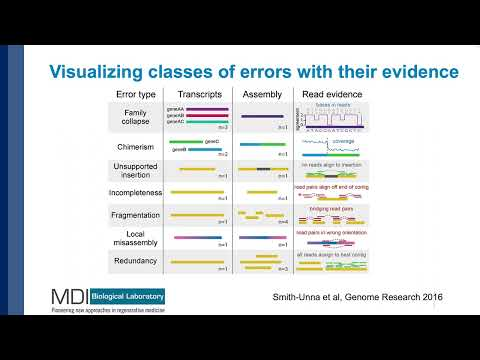

In [4]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('D95mFnIjRo4', width=800, height=400)

In [5]:
numthreads=!lscpu | grep '^CPU(s)'| awk '{print $2-1}'
THREADS = int(numthreads[0])
! echo $THREADS

3


In [7]:
! docker run -it --rm --volume /home:/home quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0 busco \
-i /home/ec2-user/SageMaker/Transcriptome-Assembly-Refinement-and-Applications/AWS/resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa \
-l vertebrata_odb10 -o GGBN01_busco_vertebrata \
--out_path /home/jupyter/buscoOutput -m tran -c $THREADS

2025-04-24 22:06:27 INFO:	***** Start a BUSCO v5.4.3 analysis, current time: 04/24/2025 22:06:27 *****
2025-04-24 22:06:27 INFO:	Configuring BUSCO with local environment
2025-04-24 22:06:27 INFO:	Mode is transcriptome
2025-04-24 22:06:27 INFO:	Downloading information on latest versions of BUSCO data...
2025-04-24 22:06:30 INFO:	Input file is /home/ec2-user/SageMaker/Transcriptome-Assembly-Refinement-and-Applications/AWS/resources/trans/Oncorhynchus_mykiss_GGBN01.1.fa
2025-04-24 22:06:30 INFO:	Downloading file 'https://busco-data.ezlab.org/v5/data/lineages/vertebrata_odb10.2024-01-08.tar.gz'
2025-04-24 22:06:40 INFO:	Decompressing file '/busco_downloads/lineages/vertebrata_odb10.tar.gz'
2025-04-24 22:06:52 INFO:	Running BUSCO using lineage dataset vertebrata_odb10 (eukaryota, 2024-01-08)
2025-04-24 22:06:54 INFO:	Running 1 job(s) on metaeuk, starting at 04/24/2025 22:06:54
2025-04-24 22:18:26 INFO:	[metaeuk]	1 of 1 task(s) completed
2025-04-24 22:18:26 INFO:	***** Run HMMER on gene sequ

**Step 10:** Look at the output.

In [ ]:
!ls ./buscoOutput/GGBN01_busco_vertebrata

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Checkpoint 1:</b> Interpret The Results 
</div>

> Consider the following result files:
> - The BUSCO result `./buscoOutput/GGBN01_busco_vertebrata/short_summary.specific.vertebrata_odb10.GGBN01_busco_vertebrata.txt`
> - The GO stats result `./onlyAnnRun/output/stats/Oncorhynchus_mykiss_GGBN01.sum_GO.txt`
> - The TransDecoder stats result: `./onlyAnnRun/output/stats/Oncorhynchus_mykiss_GGBN01.sum_transdecoder.txt`

*The green cards below are interactive. Spend some time to consider the question and click on the card to check your answer.*

In [ ]:
! pip install jupytercards

In [ ]:
from jupytercards import display_flashcards
display_flashcards('../quiz-material/03-cp1-1.json')

> Now let's take a look at where the data came from... Consider the abstract of the [Al-Tobasel et al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4764514/) paper published from this data.
>
>>*The ENCODE project revealed that ~70% of the human genome is transcribed. While only 1–2% of the RNAs encode for proteins, the rest are non-coding RNAs. Long non-coding RNAs (lncRNAs) form a diverse class of non-coding RNAs that are longer than 200nt. Emerging evidence indicates that lncRNAs play critical roles in various cellular processes including regulation of gene expression. LncRNAs show low levels of gene expression and sequence conservation, which make their computational identification in genomes difficult. In this study, more than two billion Illumina sequence reads were mapped to the genome reference using the TopHat and Cufflinks software. Transcripts shorter than 200nt, with more than 83–100 amino acids ORF, or with significant homologies to the NCBI nr-protein database were removed. In addition, a computational pipeline was used to filter the remaining transcripts based on a protein-coding-score test. Depending on the filtering stringency conditions, between 31,195 and 54,503 lncRNAs were identified, with only 421 matching known lncRNAs in other species. A digital gene expression atlas revealed 2,935 tissue-specific and 3,269 ubiquitously-expressed lncRNAs. This study annotates the lncRNA rainbow trout genome and provides a valuable resource for functional genomics research in salmonids.*

In [ ]:
display_flashcards('../quiz-material/03-cp1-2.json')

>**The key takeaway is to always be mindful of the data you are using before performing analysis on it.**

**Step 11:** Now let's try with one of the other transcriptomes that we downloaded from the NCBI Transcriptome Shotgun Assembly archive.
> This should take about **30 minutes**

In [ ]:
!docker run -it --rm --volume /home:/home quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0 busco \
    -i /home/ec2-user/SageMaker/Transcriptome-Assembly-Refinement-and-Applications/AWS/resources/trans/Pseudacris_regilla_GAEI01.1.fa \
    -l vertebrata_odb10 -o GAEI01_busco_vertebrata \
    --out_path /home/ec2-user/SageMaker/Transcriptome-Assembly-Refinement-and-Applications/AWS/buscoOutpu -m tran -c $THREADS

2025-04-24 23:00:47 INFO:	***** Start a BUSCO v5.4.3 analysis, current time: 04/24/2025 23:00:47 *****
2025-04-24 23:00:47 INFO:	Configuring BUSCO with local environment
2025-04-24 23:00:47 INFO:	Mode is transcriptome
2025-04-24 23:00:47 INFO:	Downloading information on latest versions of BUSCO data...
2025-04-24 23:00:50 INFO:	Input file is /home/ec2-user/SageMaker/Transcriptome-Assembly-Refinement-and-Applications/AWS/resources/trans/Pseudacris_regilla_GAEI01.1.fa
2025-04-24 23:00:50 INFO:	Downloading file 'https://busco-data.ezlab.org/v5/data/lineages/vertebrata_odb10.2024-01-08.tar.gz'
2025-04-24 23:01:00 INFO:	Decompressing file '/busco_downloads/lineages/vertebrata_odb10.tar.gz'
2025-04-24 23:01:12 INFO:	Running BUSCO using lineage dataset vertebrata_odb10 (eukaryota, 2024-01-08)
2025-04-24 23:01:14 INFO:	Running 1 job(s) on metaeuk, starting at 04/24/2025 23:01:14


<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Checkpoint 2:</b> Your turn to run a BUSCO analysis 
</div>

>For this checkpoint, you will run another BUSCO analysis, however, this time you will write your own execution command. For the transcriptome used, you have two options:
>1. Within the directory that we have been using for the previous two BUSCO runs, `./resources/trans`, there is one more assembled transcriptome named `Microcaecilia_dermatophaga_GFOE01.1.fa`.
>2. Go onto the NCBI Transcriptome Shotgun Assembly archive, find your own complete, assembled transcriptome, and use that.
>    - If you download the file onto your local computer, there is an upload button (up arrow) in the top left of the Jupyter interface where you can upload the file.
>    - If the file you have uploaded is zipped, you will need to unzip it using the following commands: (make sure that the file name after the `>` has the `.fa` extension.)
>```python
        !gzip -d -c ./PATH/TO/FILE.fsa_nt.gz > ./PATH/TO/FILE.1.fa
        !rm ./PATH/TO/FILE.fsa_nt.gz
>```
> Additionally, consider trying a different lineage (`-l` selection). EZlab, the creators of BUSCO, have produced a large selection of lineages to choose from. Each one has a different set of genes that BUSCO looks for. If you decide to try a different lineage, it is recommended to choose a lineage that falls somewhere within the same family. (e.g., Don't choose the `primates_odb10` lineage if you are choosing to use a bullfrog transcriptome.)
>```python
        # This will be a complete list of the available datasets
        !docker run -it --rm --volume /home:/home quay.io/biocontainers/busco:5.4.3--pyhdfd78af_0 busco --list-datasets
>```
> Feel free to reference the commands for the previous BUSCO runs and the help command we ran earlier if you are stuck. Additionally, feel free to check out the [BUSCO user guide](https://busco.ezlab.org/busco_userguide.html).
>
>After the run has been complete, consider the following:
>1. How did BUSCO perform on this transcriptome? Does the transcriptome appear to be well assembled based on the provided lineage? If the results are not good, consider the possible reasons why? Is it more likely that the transcriptome chosen was not good? Or potentially a poorly chosen lineage? Or maybe something else entirely?
>2. What could be a logical biological reason the output says that there are duplicate copies of the same gene?
>3. What could be a possible reason for fragmented copies?
>4. Why is it that broader lineages such as metazoa have far fewer genes (954) that BUSCO looks for compared to more specific lineages such as mammalia which has far more genes (9226) that BUSCO looks for?

In [ ]:
# Put your BUSCO command here


## Conclusion

This Jupyter Notebook demonstrated the "annotation only" run of TransPi, utilizing a pre-assembled transcriptome of *Oncorhynchus mykiss* (Rainbow Trout) containing 31,176 transcripts.  By modifying the `nextflow.config` file and leveraging the `--onlyAnn` option, we efficiently performed annotation steps, including Pfam and BLAST analyses, without repeating the assembly process.  Furthermore, the notebook introduced the concept of Docker containers, showcasing their use in executing BUSCO analysis for assessing transcriptome completeness.  The practical application of BUSCO, along with interpretation of the resulting output files (including GO stats and TransDecoder statistics), emphasized the importance of data context and critical evaluation of transcriptome assembly quality.  Finally, the notebook concluded with a hands-on exercise, prompting users to perform their own BUSCO analysis on a different transcriptome, fostering a deeper understanding of the workflow and its applications.

## Clean Up

Remember to proceed to the next notebook [`Submodule_04_gls_assembly.ipynb`](Submodule_04_gls_assembly.ipynb) or shut down your instance if you are finished.